In [1]:
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Dense, Embedding, Flatten, Reshape
from keras.optimizers import Adam

Using TensorFlow backend.


<h1>Traitement des données</h1>

In [2]:
# chargement des deux tables
real_news = pd.read_csv("./dataset1/True.csv")
fake_news = pd.read_csv("./dataset1/Fake.csv")

In [3]:
# vrai = 1, faux = 0
real_news["label"] = 1
fake_news["label"] = 0

In [4]:
real_news.sample(5)

,title,text,subject,date,label
8395,Exclusive: Clinton leads Trump in key swing st...,NEW YORK (Reuters) - If the U.S. presidential...,politicsNews,"August 24, 2016",1
486,Trump calls for boycott of television network ...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"November 29, 2017",1
12004,German ex-rightist jailed for plotting Islamis...,BERLIN (Reuters) - A German court sentenced a ...,worldnews,"December 18, 2017",1
17198,U.S. mulls potential F-16 sale to Greece: Trump,WASHINGTON (Reuters) - U.S President Donald Tr...,worldnews,"October 17, 2017",1
9130,Kerry launches talks with Venezuela but backs ...,SANTO DOMINGO (Reuters) - U.S. Secretary of St...,politicsNews,"June 14, 2016",1


In [5]:
fake_news.sample(5)

,title,text,subject,date,label
18684,TWO SOMALI MUSLIM MEN Arrested For Daytime Gun...,Police on Tuesday arrested two people and were...,left-news,"May 5, 2017",0
11314,NANCY PELOSI Tries to Lead Democrats in Chants...,,politics,"Mar 24, 2017",0
140,Hawaiians Had The Perfect Signs To Infuriate ...,"Donald Trump stopped in Hawaii, which is total...",News,"November 4, 2017",0
23098,Boiler Room #88 – Behold: Your New Ministry of...,Tune in to the Alternate Current Radio Network...,Middle-east,"December 15, 2016",0
11835,OOPS! Secret Service Opens Investigation After...,A spokesman for the Secret Service told The Ga...,politics,"Jan 21, 2017",0


In [6]:
# création du dataset complet
dataframe = pd.concat([real_news, fake_news])
dataframe.sample(10)

,title,text,subject,date,label
3057,"Trump Staff Clapped, Laughed While He Called ...",During president-elect Donald Trump s first pr...,News,"January 11, 2017",0
4928,White House proposes to privatize air traffic ...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"March 16, 2017",1
6033,White House pledges aid to help Chicago quell ...,WASHINGTON/CHICAGO (Reuters) - President Donal...,politicsNews,"January 25, 2017",1
12165,U.S. says it wants Syrian government to negoti...,WASHINGTON (Reuters) - The United States on Fr...,worldnews,"December 15, 2017",1
19392,IRRATIONAL GEORGETOWN PROFESSOR Has Month-Long...,A Georgetown University associate professor ha...,left-news,"Dec 28, 2016",0
12728,"Head of Zimbabwe election commission quits, so...",HARARE (Reuters) - Zimbabwe Electoral Commissi...,worldnews,"December 8, 2017",1
16064,Turkey's Erdogan takes legal action after lawm...,ISTANBUL (Reuters) - President Tayyip Erdogan ...,worldnews,"October 31, 2017",1
2094,Trump Supporter Threatens To Slaughter Black ...,Ever since Officer Darren Wilson murdered unar...,News,"March 19, 2017",0
16989,[VIDEO] Obama Needed A Girl To Take Down Mitt ...,Because Obama s doing such a great job keeping...,Government News,"Nov 3, 2015",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0


In [7]:
print(f"Nombre de références : {dataframe.title.count()}")
print(f"Nombre de fake news : {fake_news.title.count()}")
print(f"Nombre de vraies news : {real_news.title.count()}")

Nombre de références : 44898
Nombre de fake news : 23481
Nombre de vraies news : 21417


In [8]:
# ici on ne s'intéresse qu'au titre et au label
del dataframe["title"]
del dataframe["subject"]
del dataframe["date"]

In [9]:
dataframe.sample(10)

,text,label
16831,ISTANBUL/ANKARA (Reuters) - Turkish President ...,1
16352,SEOUL (Reuters) - South Korea said on Friday i...,1
21371,"AL UDEID AIR BASE, Qatar (Reuters) - Even as t...",1
14353,This letter was originally attributed to well-...,0
10595,The only two black jurors in the Philando Cast...,0
2555,"WASHINGTON (Reuters) - Jared Kushner, adviser ...",1
17940,Two hypocrite climate change freaks decided to...,0
4046,WASHINGTON (Reuters) - U.S. President Donald T...,1
12332,Something was bothering Donald Trump as he mad...,0
8533,"(Reuters) - The mayor of Stockton, California,...",1


In [10]:
# nettoyage des données (ponctuations)

stopWords = set(stopwords.words("english"))

def cleanText(text):
    forbidden = {",","@",";","/","-",":",".","!","?", "#","\"","(",")","\'","’","‘","–"}
    res = text
    if res != None:
        for elm in forbidden:
            res = res.replace(elm, "")
        res = res.split()
        cleaned = []
        for word in res:
            if not word in stopWords:
                cleaned.append(word)
        res = " ".join(cleaned[0:min(29, len(cleaned) - 1)])
    return res

dataframe["text"] = dataframe["text"].apply(cleanText)

dataframe.sample(10)

,text,label
18418,The Washington Post published propaganda organ...,0
22718,CIA appointed head Mike Pompeo ready disregard...,0
1253,White House Press Secretary Sean Spicer hardes...,0
2768,WASHINGTON Reuters Michael Caputo adviser Pres...,1
8198,An anchor Glenn Beck TV network The Blaze late...,0
3262,Despite deal absolute imbecile challenger seve...,0
12968,ADU DHABI Reuters Saudi Arabia interested reac...,1
15831,Yada yada yada Hillary Clinton announced 2016 ...,0
12322,GENEVA Reuters UN Special Envoy Syria Staffan ...,1
7545,Donald Trump spokeswoman Katrina Pierson went ...,0


In [12]:
# on sépare les données en données d'entraînement et données de test (80% et 20%)
x_train, x_test, y_train, y_test = train_test_split(dataframe["text"], dataframe["label"], test_size=0.25, random_state = 42)
print(f"Données d'entrainement : {len(x_train)}")
print(f"Données de test : {len(x_test)}")

Données d'entrainement : 33673
Données de test : 11225


In [13]:
max_features = 10000 # taille max du vocab
maxlen = 30 # taille max de séquence

In [14]:
# vectorisation naïve en "one-hot"
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)

In [15]:
# vectorisation des données d'entraînement
x_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(x_train, maxlen=maxlen)

In [16]:
# vectorisation des données de test
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [17]:
batch_size = 256
nb_epochs = 20
embedded_dim = 100

In [18]:
model = Sequential()
model.add(Embedding(max_features, output_dim=embedded_dim, input_length=maxlen, trainable=True))
model.add(Reshape((1, 30, 100)))
model.add(Conv2D(64, (3, 1), padding="same"))
model.add(Dropout(0.1))
model.add(Conv2D(32, (3, 1), padding="same"))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.0002), metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1000000   
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 30, 100)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 30, 64)         19264     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 30, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 30, 32)         6176      
_________________________________________________________________
flatten_1 (Flatten)          (None, 960)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [19]:
progress = model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epochs, validation_data=(x_test, y_test))

C:\Users\Shadow\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 33673 samples, validate on 11225 samples
Epoch 1/20
33673/33673 [==============================] - 6s 175us/step - loss: 0.5731 - accuracy: 0.7226 - val_loss: 0.2238 - val_accuracy: 0.9425
Epoch 2/20
33673/33673 [==============================] - 1s 30us/step - loss: 0.0779 - accuracy: 0.9791 - val_loss: 0.0381 - val_accuracy: 0.9882
Epoch 3/20
33673/33673 [==============================] - 1s 34us/step - loss: 0.0180 - accuracy: 0.9961 - val_loss: 0.0214 - val_accuracy: 0.9934
Epoch 4/20
33673/33673 [==============================] - 1s 34us/step - loss: 0.0072 - accuracy: 0.9988 - val_loss: 0.0162 - val_accuracy: 0.9953
Epoch 5/20
33673/33673 [==============================] - 1s 32us/step - loss: 0.0035 - accuracy: 0.9995 - val_loss: 0.0143 - val_accuracy: 0.9958
Epoch 6/20
33673/33673 [==============================] - 1s 29us/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.0132 - val_accuracy: 0.9963
Epoch 7/20
33673/33673 [==============================] - 1s 29us/s

In [20]:
model.save("detectorText.h5")

In [21]:
# art plastique du turfu featuring le poto matplotlib
from matplotlib import pyplot as plt

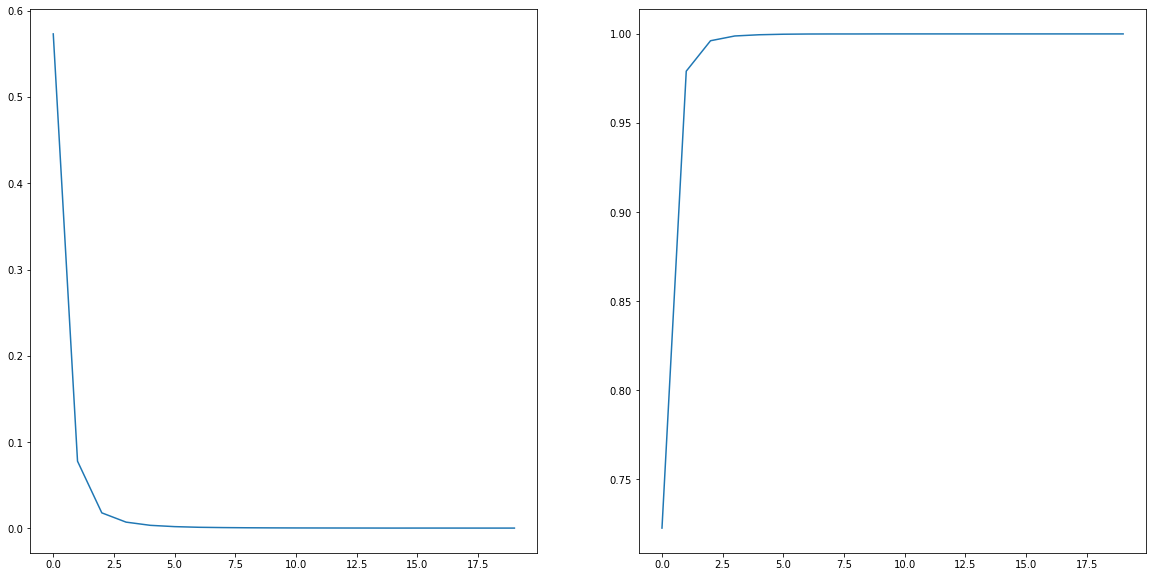

In [22]:
figure, ax = plt.subplots(1, 2)
figure.set_size_inches(20,10)

ax[0].plot(progress.history["loss"])

ax[1].plot(progress.history["accuracy"])

plt.show()

In [23]:
to_predict = dataframe.sample(5)

In [25]:
X_test = to_predict["text"]
X_test

450      A Michigan woman decided defend tyranny anothe...
6344     On Sunday President Barack Obama gave amazing ...
12350    LONDON Reuters Britain urgently needs standsti...
3448     NEW YORKWASHINGTON Reuters US President Donald...
22345    RTThe father Cuban Revolution remains unbeaten...
Name: text, dtype: object

In [26]:
Y_test = to_predict["label"]
Y_test

450      0
6344     0
12350    1
3448     1
22345    0
Name: label, dtype: int64

In [27]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=maxlen)
X_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,   21,  764,  217,
        339, 1077, 7657,  108, 1032,  250, 1719,   40,  676, 1214, 1325,
       6812,  997, 6812, 1330,   34, 6987, 1091, 6492])

In [28]:
model.predict(X_test)

array([[2.7591346e-08],
       [4.6096313e-09],
       [9.9999774e-01],
       [1.0000000e+00],
       [1.1502953e-04]], dtype=float32)

In [29]:
X_test

array([[   0,    0,    0,    0,    0,    0,    0,    0,   21,  764,  217,
         339, 1077, 7657,  108, 1032,  250, 1719,   40,  676, 1214, 1325,
        6812,  997, 6812, 1330,   34, 6987, 1091, 6492],
       [   0,    0,    0,    0,    0,  168,   60,    7,   79,   13,  447,
        2170,  164,  507, 6746,  180, 5675,   17,   13,  287, 2015, 3477,
        1033,   10,  102, 1571, 1374, 1305, 1494,   13],
       [   0,    0,    0,    0,  128,    1,  216, 9107,  685,  121,  320,
         454,  116,  139, 6539,  802, 1987,  658,  276, 3137, 8424,  430,
         861,   83,  201,    5,   21,  802,  401, 2190],
       [   0,    9, 4044,    1,    4,    7,    6,    2,    5,   18, 5648,
          48,  359,  458, 2379,   12, 9591,  441,  291,  882,   74,  722,
          77,   74,  551, 1888, 4938,  942,  184, 4375],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  845,
        1868, 6223, 1798, 5374,   70,  411,   81,  520, 3997, 3233, 8777,
        4207,  123, 2224, 8092, 